In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
df = pd.read_csv("/kaggle/input/global-ai-job-market-and-salary-trends-2025/ai_job_dataset.csv")
data = df.copy()
data.head()

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_id                  15000 non-null  object 
 1   job_title               15000 non-null  object 
 2   salary_usd              15000 non-null  int64  
 3   salary_currency         15000 non-null  object 
 4   experience_level        15000 non-null  object 
 5   employment_type         15000 non-null  object 
 6   company_location        15000 non-null  object 
 7   company_size            15000 non-null  object 
 8   employee_residence      15000 non-null  object 
 9   remote_ratio            15000 non-null  int64  
 10  required_skills         15000 non-null  object 
 11  education_required      15000 non-null  object 
 12  years_experience        15000 non-null  int64  
 13  industry                15000 non-null  object 
 14  posting_date            15000 non-null

In [4]:
data.drop("job_id", axis=1, inplace=True)

scale_vars = ['salary_usd', 'years_experience', 'job_description_length', 'benefits_score']
ordinal_vars = ['experience_level', 'company_size', 'remote_ratio', 'education_required']
nominal_vars = ['job_title', 'salary_currency', 'employment_type', 'company_location', 'employee_residence', 'industry', 'company_name']
date_vars = ['posting_date', 'application_deadline']
string_vars = ['required_skills']

# Distributions of the columns

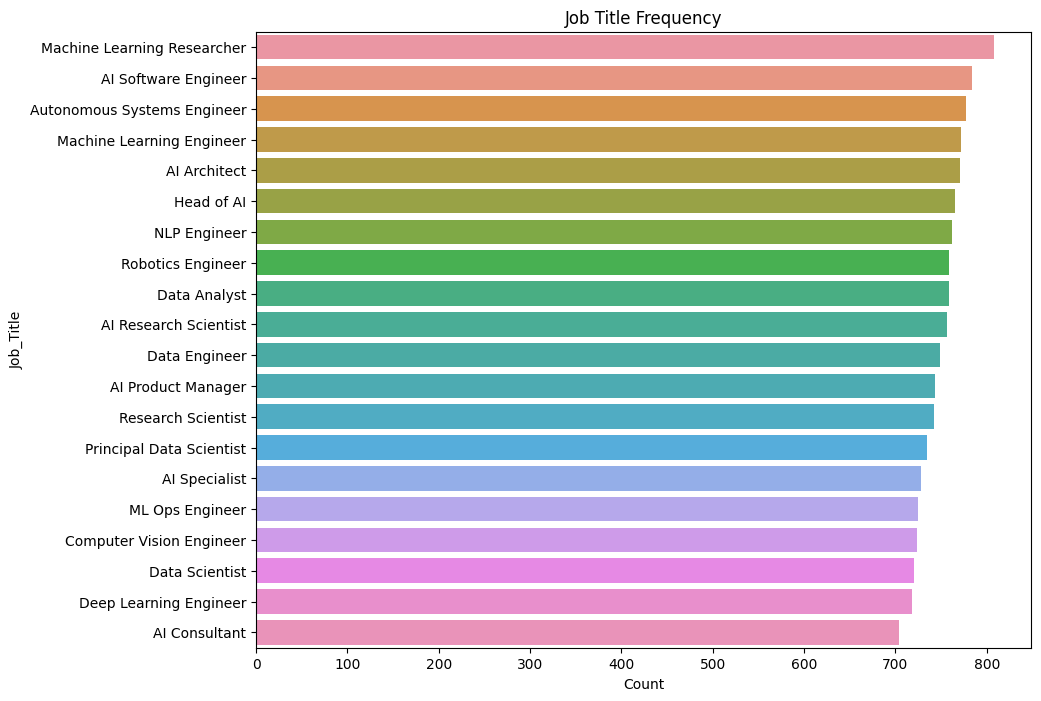

In [5]:
plt.figure(figsize=(10, 8))
sns.countplot(data, y="job_title", order=data.job_title.value_counts().index)
plt.title("Job Title Frequency")
plt.xlabel("Count")
plt.ylabel("Job_Title")
plt.show()

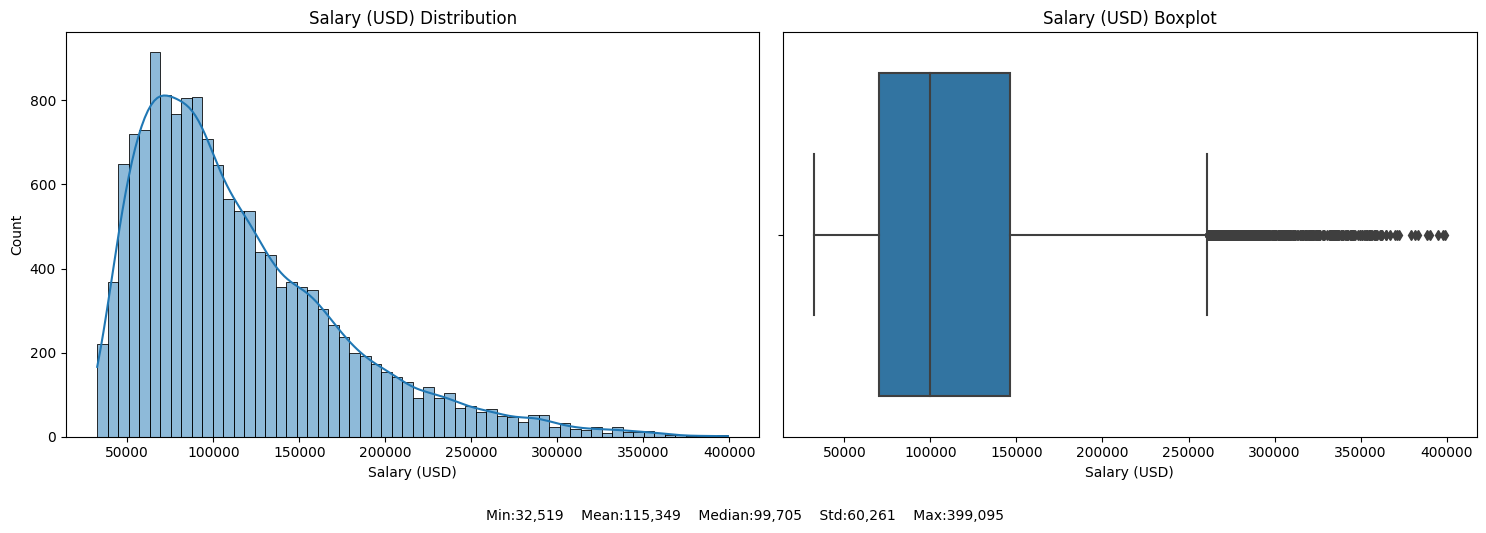

In [6]:
plt.figure(figsize=(15, 5))

# Histogram + KDE (subplot 1)
plt.subplot(1, 2, 1)
sns.histplot(data=data, x="salary_usd", kde=True)
plt.title("Salary (USD) Distribution")
plt.xlabel("Salary (USD)")
plt.ylabel("Count")

# Boxplot (subplot 2)
plt.subplot(1, 2, 2)
sns.boxplot(x=data["salary_usd"], orient="h")
plt.title("Salary (USD) Boxplot")
plt.xlabel("Salary (USD)")

salart_ist = data['salary_usd'].describe() 
salary_median = data['salary_usd'].median()
salart_ist_str = f"Min:{salart_ist[3]:,.0f}    Mean:{salart_ist[1]:,.0f}    Median:{salary_median:,.0f}    Std:{salart_ist[2]:,.0f}    Max:{salart_ist[7]:,.0f}"
plt.figtext(0.5, -0.05,salart_ist_str , ha="center")
plt.tight_layout()
plt.show()

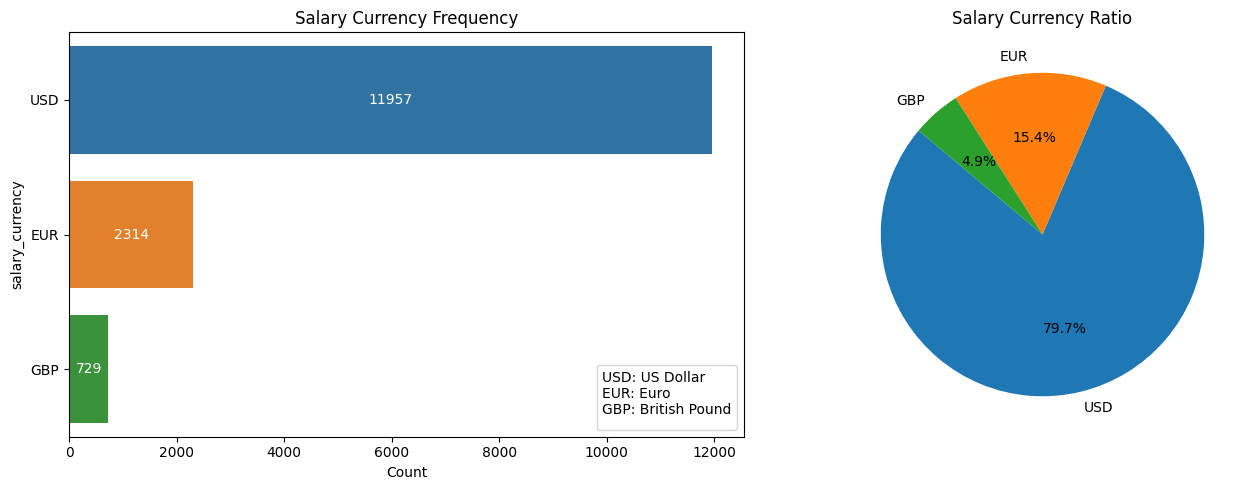

In [7]:
plt.figure(figsize=(14, 5))

# 1. subplot: countplot
plt.subplot(1, 2, 1)
ax = sns.countplot(data=data, y="salary_currency", order=data.salary_currency.value_counts().index)
plt.title("Salary Currency Frequency")
plt.xlabel("Count")
plt.ylabel("salary_currency")
plt.legend(title="USD: US Dollar\nEUR: Euro\nGBP: British Pound", loc="lower right")
ax.bar_label(ax.containers[0], label_type='center', color='white', fontsize=10)

# 2. subplot: pie chart
plt.subplot(1, 2, 2)
salary_counts = data['salary_currency'].value_counts()
plt.pie(salary_counts, labels=salary_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Salary Currency Ratio")

plt.tight_layout()
plt.show()

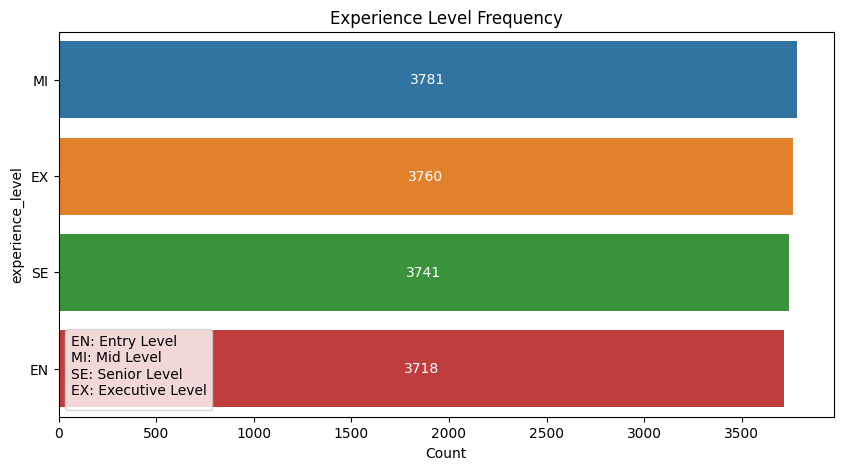

In [8]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(data, y="experience_level", order=data.experience_level.value_counts().index)
plt.title("Experience Level Frequency")
plt.xlabel("Count")
plt.ylabel("experience_level")
plt.legend(title="EN: Entry Level\nMI: Mid Level\nSE: Senior Level\nEX: Executive Level", loc="lower left")
ax.bar_label(ax.containers[0], label_type='center', color='white', fontsize=10)
plt.show()

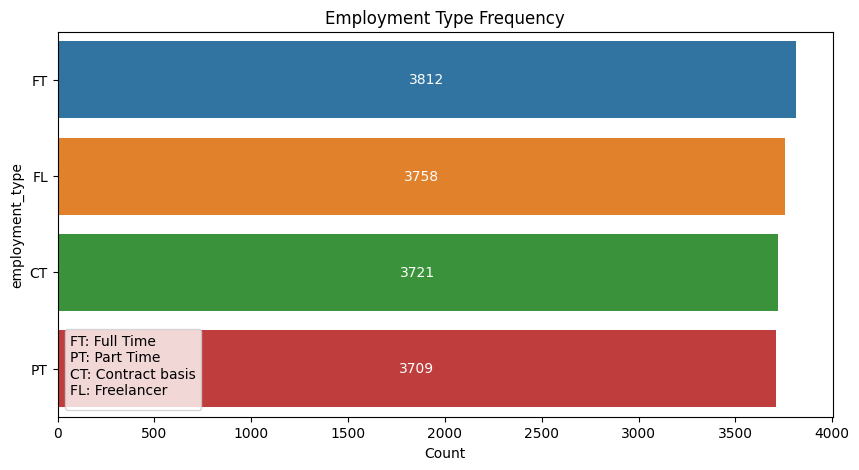

In [9]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(data, y="employment_type", order=data.employment_type.value_counts().index)
plt.title("Employment Type Frequency")
plt.xlabel("Count")
plt.ylabel("employment_type")
plt.legend(title="FT: Full Time\nPT: Part Time\nCT: Contract basis\nFL: Freelancer", loc="lower left")
ax.bar_label(ax.containers[0], label_type='center', color='white', fontsize=10)
plt.show()

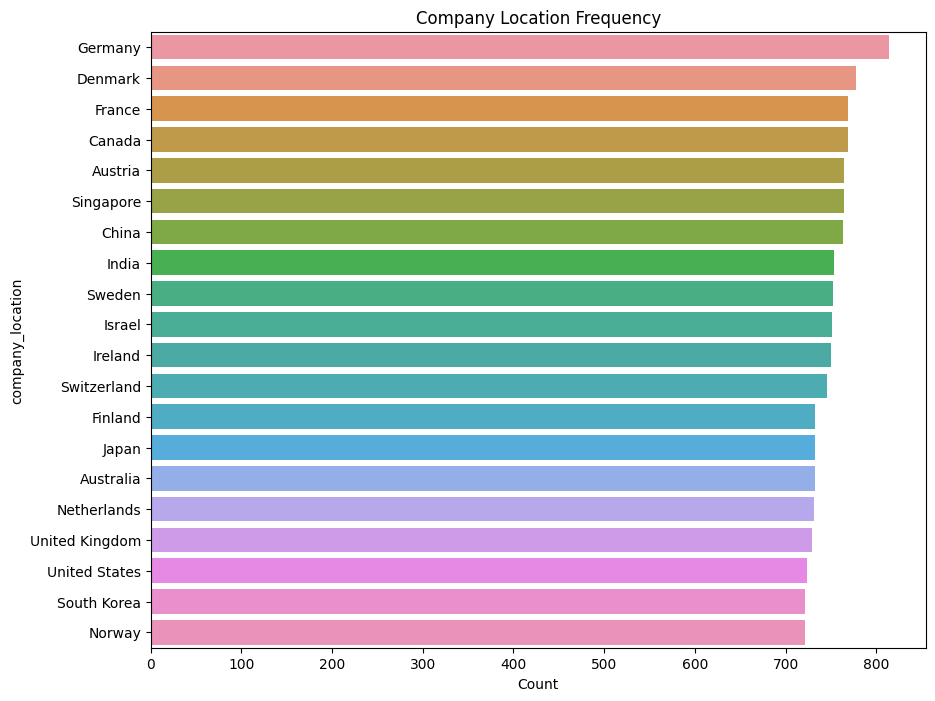

In [10]:
plt.figure(figsize=(10, 8))
sns.countplot(data, y="company_location", order=data.company_location.value_counts().index)
plt.title("Company Location Frequency")
plt.xlabel("Count")
plt.ylabel("company_location")
plt.show()

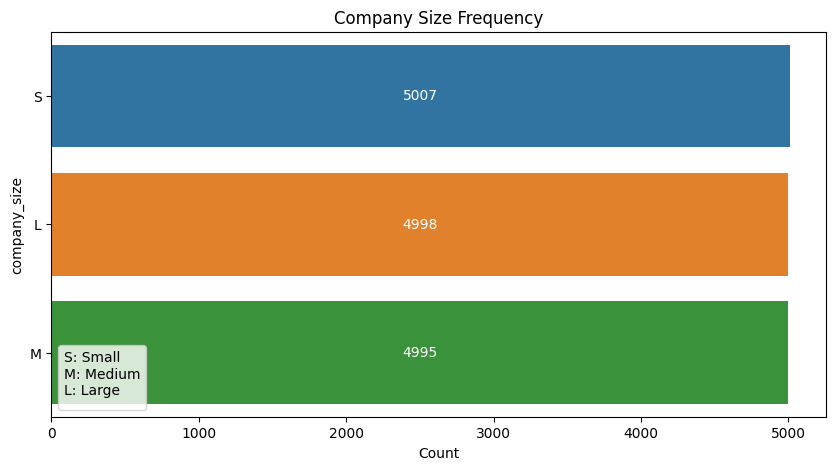

In [11]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(data, y="company_size", order=data.company_size.value_counts().index)
plt.title("Company Size Frequency")
plt.xlabel("Count")
plt.ylabel("company_size")
plt.legend(title="S: Small\nM: Medium\nL: Large", loc="lower left")
ax.bar_label(ax.containers[0], label_type='center', color='white', fontsize=10)
plt.show()

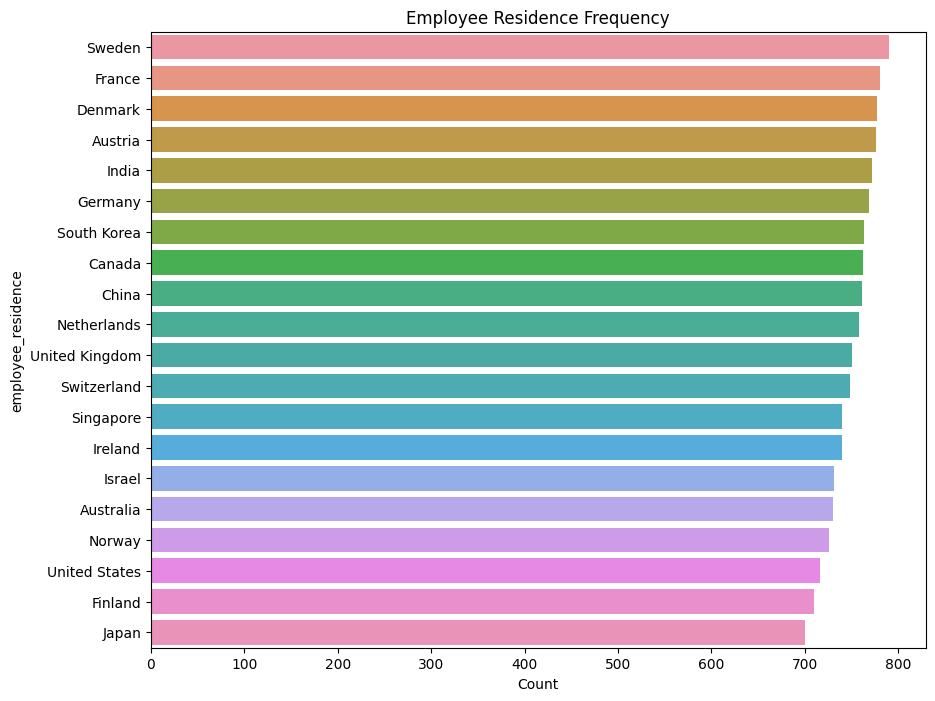

In [12]:
plt.figure(figsize=(10, 8))
sns.countplot(data, y="employee_residence", order=data.employee_residence.value_counts().index)
plt.title("Employee Residence Frequency")
plt.xlabel("Count")
plt.ylabel("employee_residence")
plt.show()

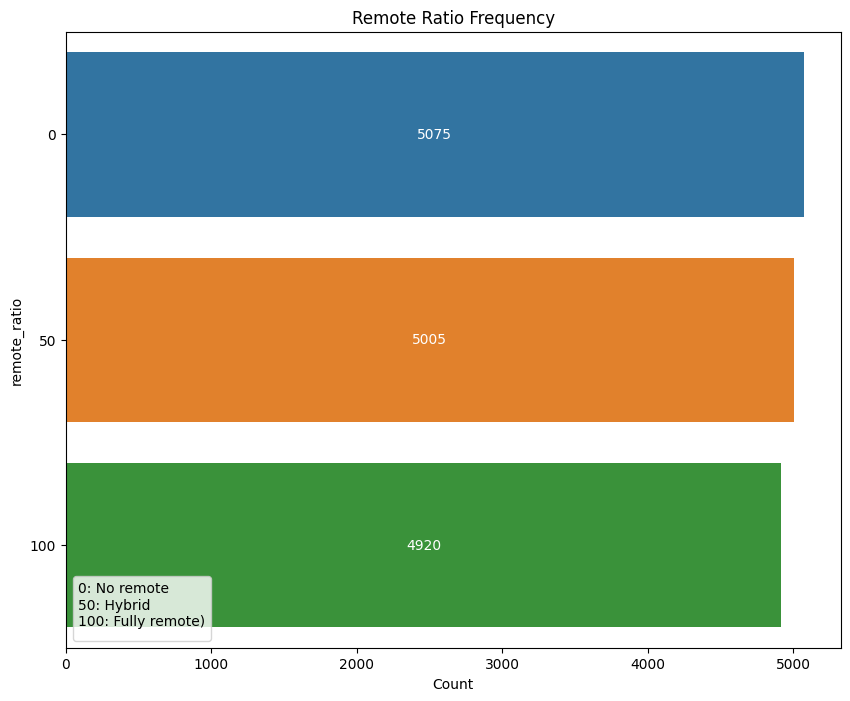

In [13]:
plt.figure(figsize=(10, 8))
ax = sns.countplot(data, y="remote_ratio", order=data.remote_ratio.value_counts().index)
plt.title("Remote Ratio Frequency")
plt.xlabel("Count")
plt.ylabel("remote_ratio")
ax.bar_label(ax.containers[0], label_type='center', color='white', fontsize=10)
plt.legend(title="0: No remote\n50: Hybrid\n100: Fully remote)", loc="lower left")
plt.show()

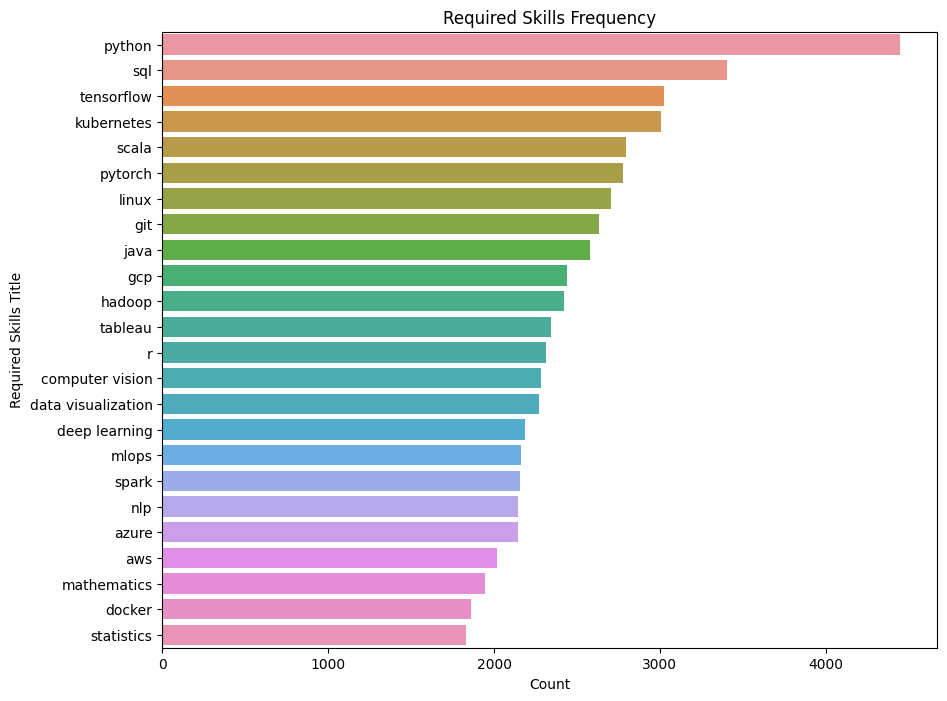

In [14]:
all_skills = data['required_skills'].dropna().str.lower().str.split(',').explode().str.strip()
all_skills = pd.DataFrame(all_skills)

plt.figure(figsize=(10, 8))
sns.countplot(all_skills, y="required_skills", order=all_skills.required_skills.value_counts().index)
plt.title("Required Skills Frequency")
plt.xlabel("Count")
plt.ylabel("Required Skills Title")
plt.show()

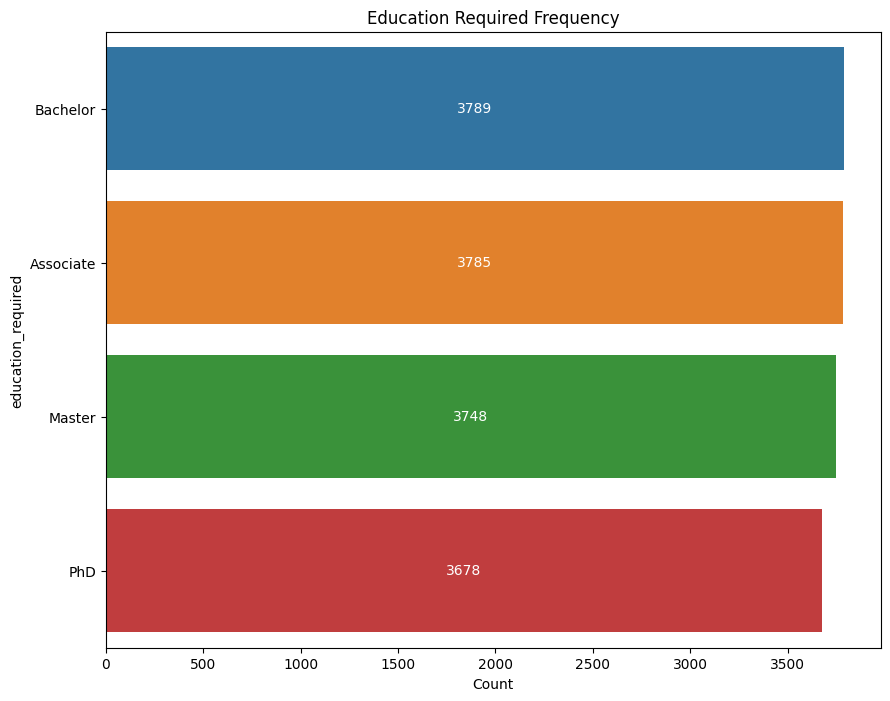

In [15]:
plt.figure(figsize=(10, 8))
ax = sns.countplot(data, y="education_required", order=data.education_required.value_counts().index)
plt.title("Education Required Frequency")
plt.xlabel("Count")
plt.ylabel("education_required")
ax.bar_label(ax.containers[0], label_type='center', color='white', fontsize=10)
plt.show()

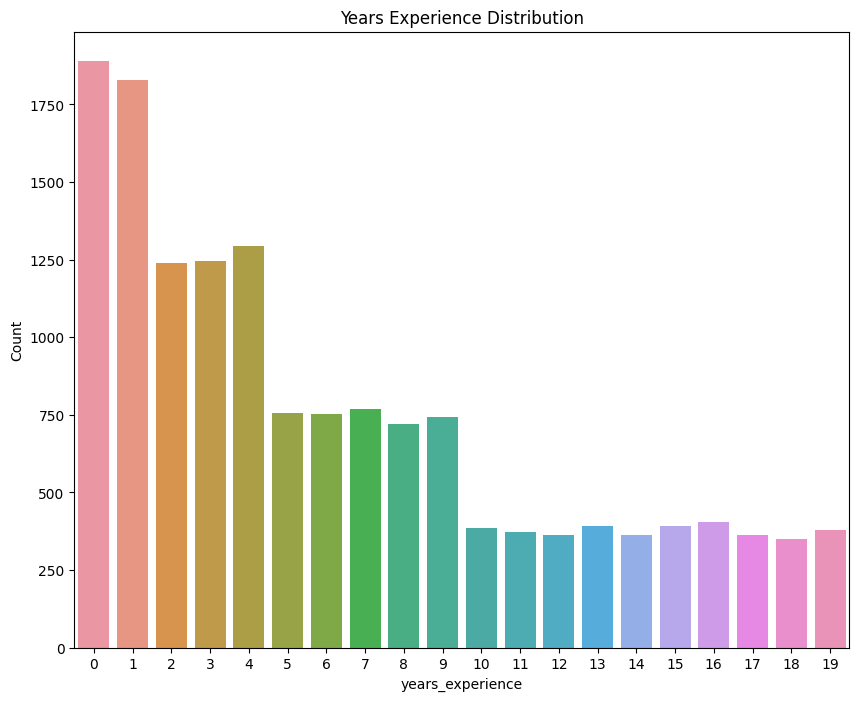

In [16]:
plt.figure(figsize=(10, 8))
sns.countplot(data, x="years_experience")
plt.title("Years Experience Distribution")
plt.xlabel("years_experience")
plt.ylabel("Count")
plt.show()

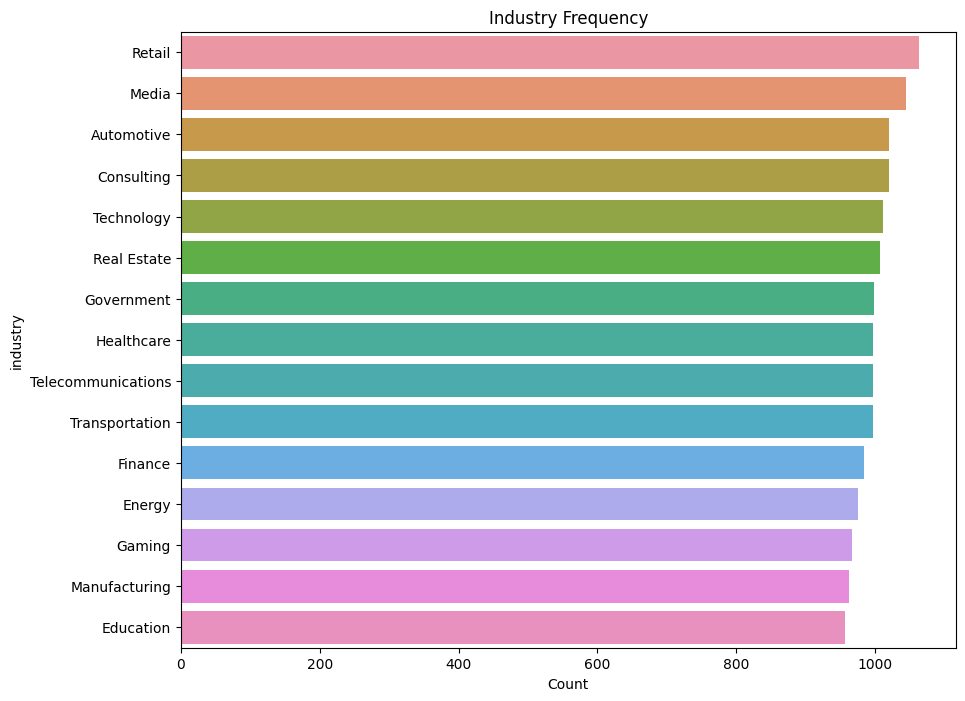

In [17]:
plt.figure(figsize=(10, 8))
sns.countplot(data, y="industry", order=data.industry.value_counts().index)
plt.title("Industry Frequency")
plt.xlabel("Count")
plt.ylabel("industry")
plt.show()

In [18]:
data['posting_date'] = pd.to_datetime(data['posting_date'])
data['posting_date_month'] = data['posting_date'].dt.to_period('M')
posting_date_month_counts = data['posting_date_month'].value_counts().sort_index()

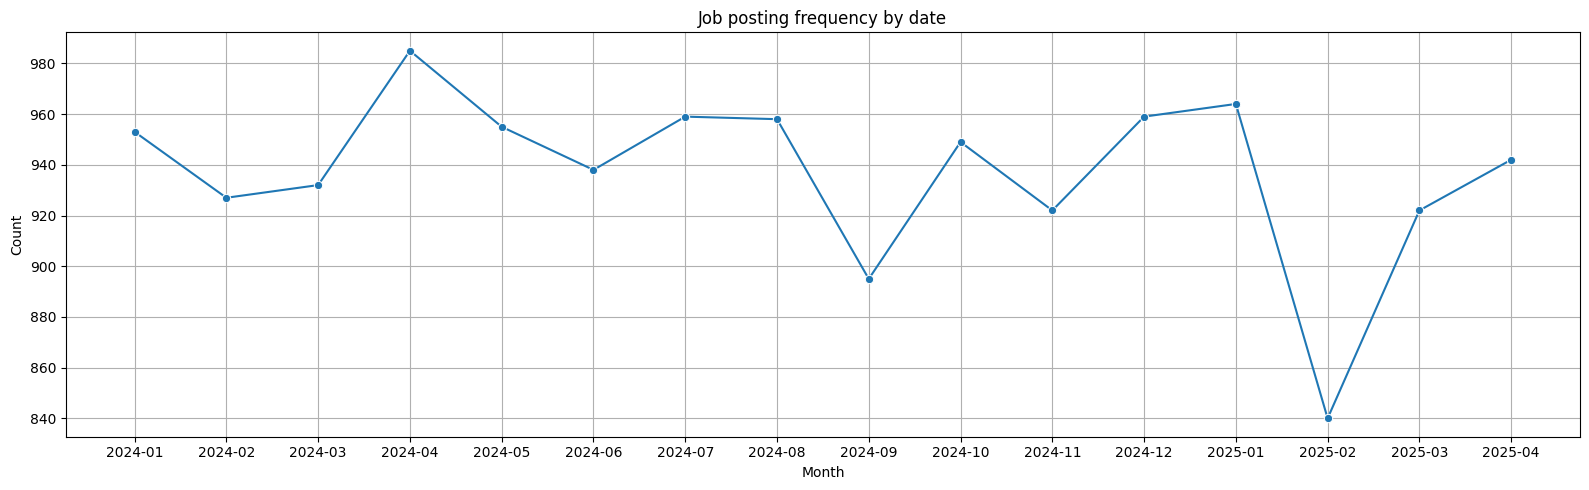

In [19]:
plt.figure(figsize=(16, 5))
sns.lineplot(x=posting_date_month_counts.index.astype(str), y=posting_date_month_counts.values, marker="o")
plt.title("Job posting frequency by date")
plt.xlabel("Month")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()

In [20]:
data['application_deadline'] = pd.to_datetime(data['application_deadline'])
data['application_deadline_month'] = data['application_deadline'].dt.to_period('M')
application_deadline_month_counts = data['application_deadline_month'].value_counts().sort_index()

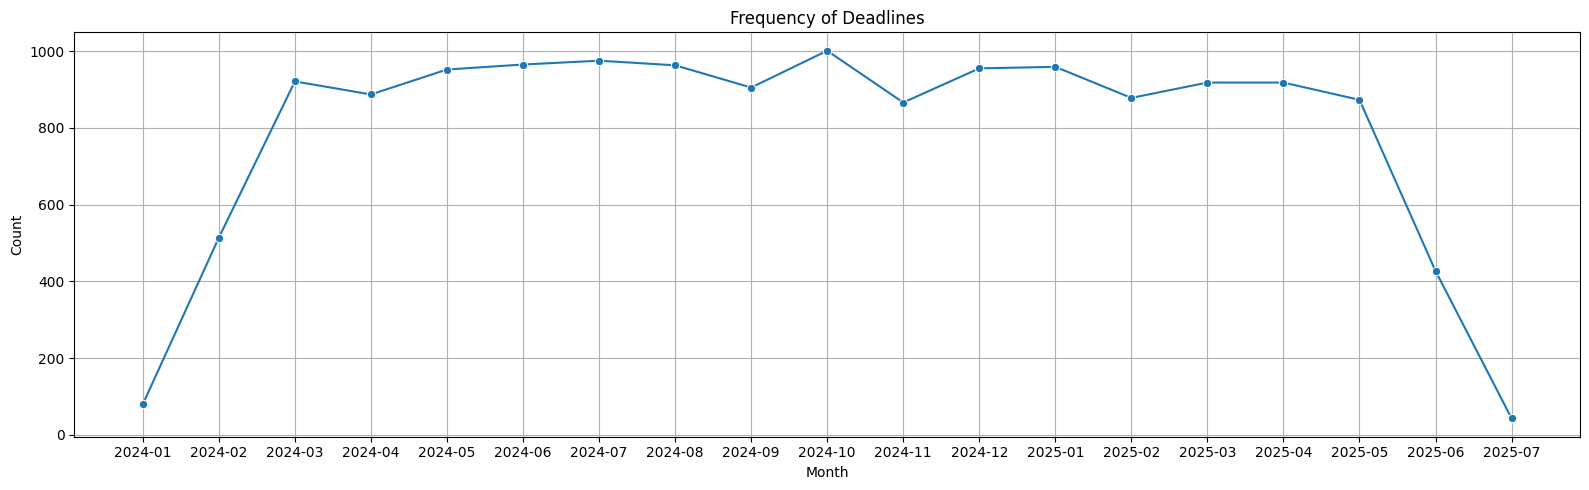

In [21]:
plt.figure(figsize=(16, 5))
sns.lineplot(x=application_deadline_month_counts.index.astype(str), y=application_deadline_month_counts.values, marker="o")
plt.title("Frequency of Deadlines")
plt.xlabel("Month")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()

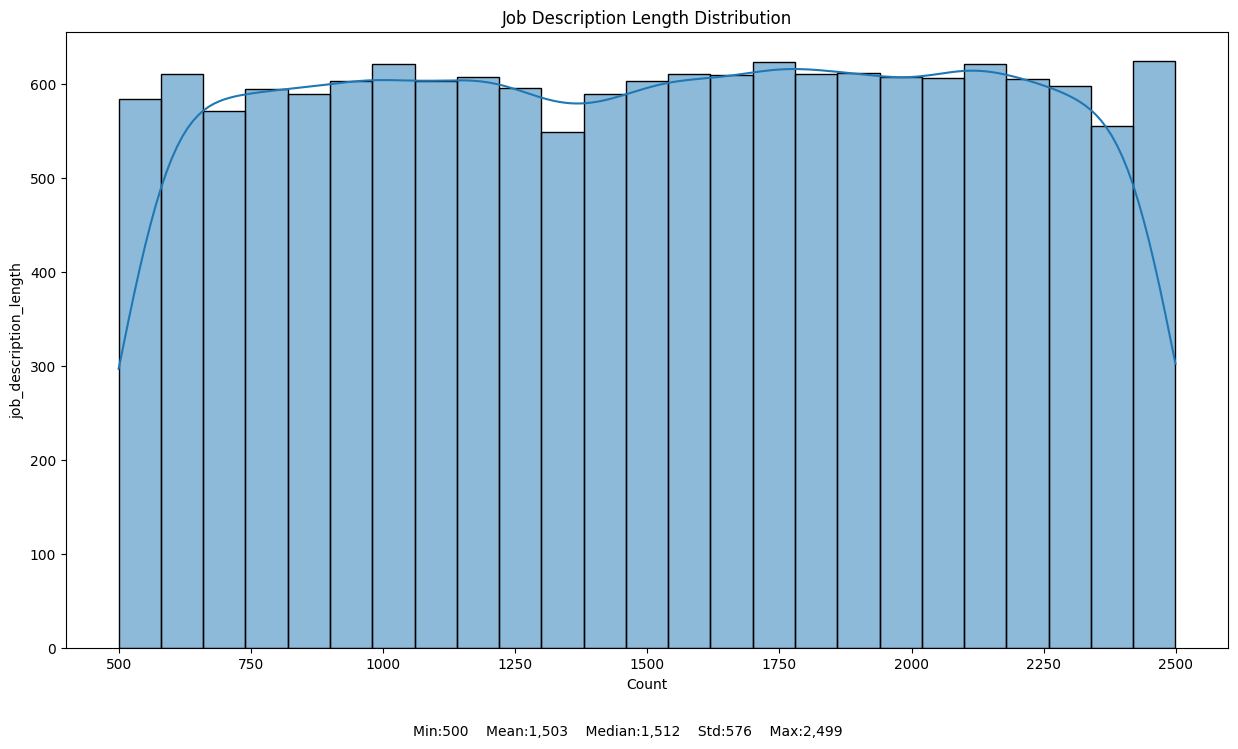

In [22]:
plt.figure(figsize=(15, 8))
sns.histplot(data=data, x="job_description_length", kde=True)
plt.title("Job Description Length Distribution")
plt.xlabel("Count")
plt.ylabel("job_description_length")

description_ist = data['job_description_length'].describe() 
description_median = data['job_description_length'].median()
description_ist_str = f"Min:{description_ist[3]:,.0f}    Mean:{description_ist[1]:,.0f}    Median:{description_median:,.0f}    Std:{description_ist[2]:,.0f}    Max:{description_ist[7]:,.0f}"
plt.figtext(0.5, -0.00005,description_ist_str , ha="center")

plt.show()

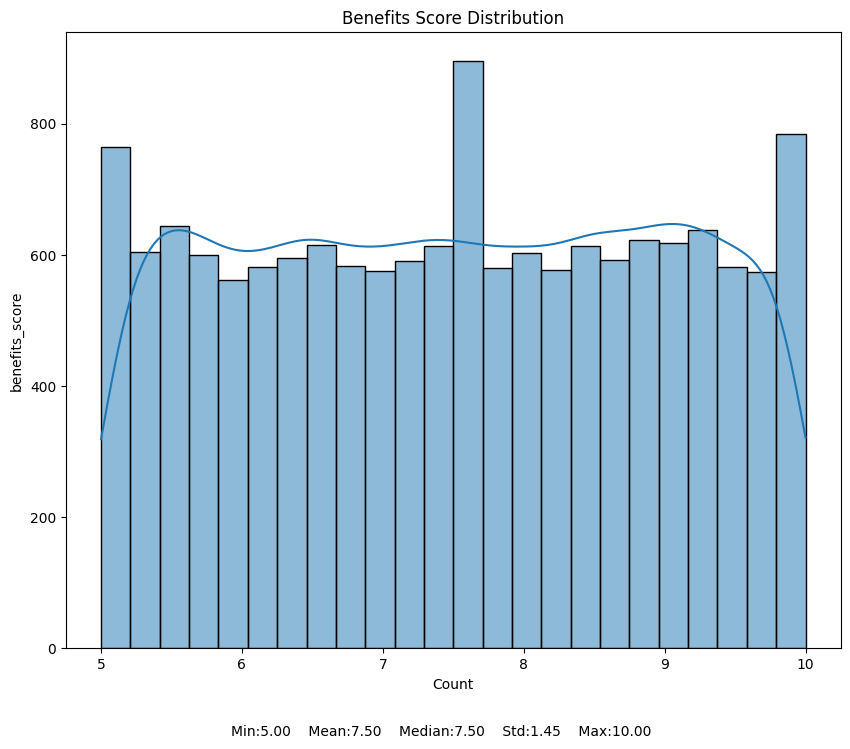

In [23]:
plt.figure(figsize=(10, 8))
sns.histplot(data=data, x="benefits_score", kde=True)
plt.title("Benefits Score Distribution")
plt.xlabel("Count")
plt.ylabel("benefits_score")

benefits_ist = data['benefits_score'].describe() 
benefits_median = data['benefits_score'].median()
benefits_ist_str = f"Min:{benefits_ist[3]:.2f}    Mean:{benefits_ist[1]:.2f}    Median:{benefits_median:.2f}    Std:{benefits_ist[2]:.2f}    Max:{benefits_ist[7]:.2f}"
plt.figtext(0.5, -0.00005,benefits_ist_str , ha="center")

plt.show()

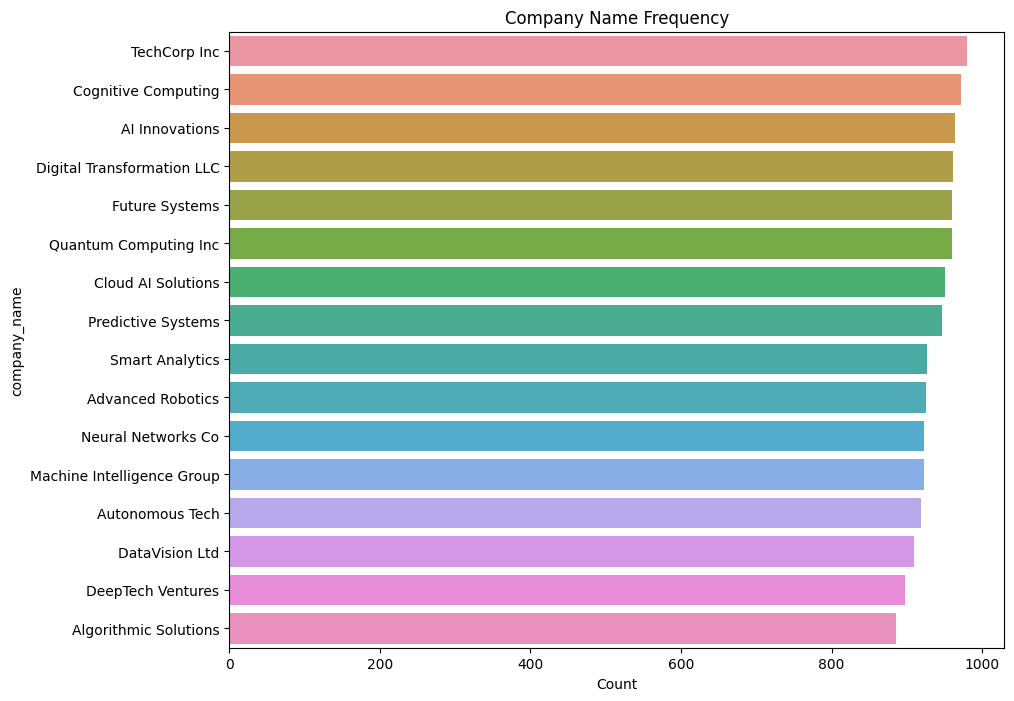

In [24]:
plt.figure(figsize=(10, 8))
sns.countplot(data, y="company_name", order=data.company_name.value_counts().index)
plt.title("Company Name Frequency")
plt.xlabel("Count")
plt.ylabel("company_name")
plt.show()

# Relationships

* company_location - employee_residence
* company_location - salary_currency
* employee_residence - salary_currency
---
* experience_level - salary_usd
* experience_level - years_experience
---
* salary_usd - years_experience

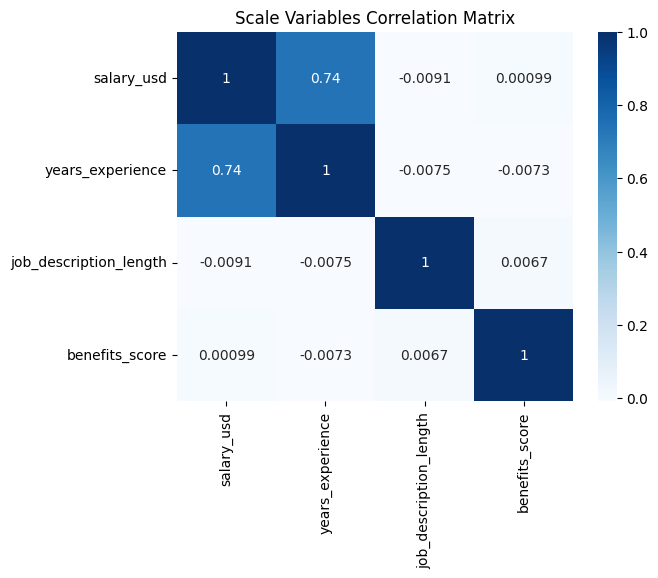

In [25]:
sns.heatmap(df[scale_vars].corr(), annot=True, cmap='Blues')
plt.title("Scale Variables Correlation Matrix")
plt.show()

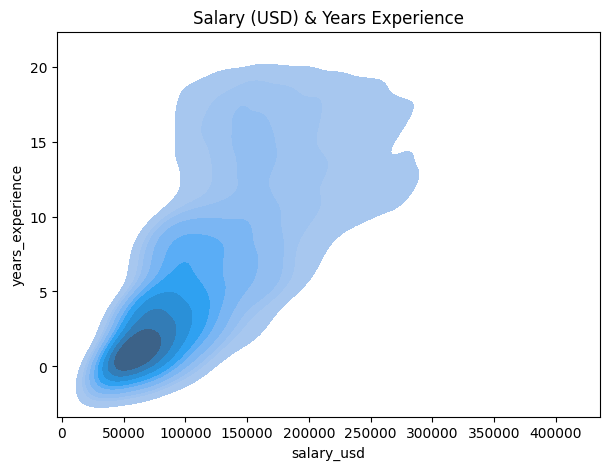

In [26]:
plt.figure(figsize=(7, 5))

sns.kdeplot(data=df, x='salary_usd', y='years_experience', fill=True)
plt.title('Salary (USD) & Years Experience')

plt.show()

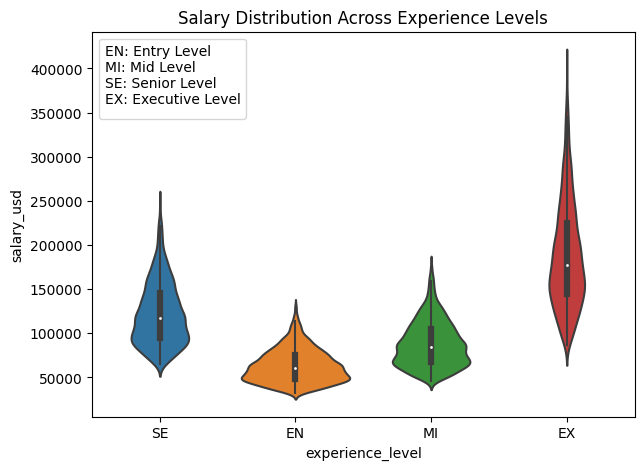

In [27]:
plt.figure(figsize=(7, 5))

sns.violinplot(x='experience_level', y='salary_usd', data=data)
plt.title("Salary Distribution Across Experience Levels")
plt.legend(title="EN: Entry Level\nMI: Mid Level\nSE: Senior Level\nEX: Executive Level", loc="upper left")

plt.show()

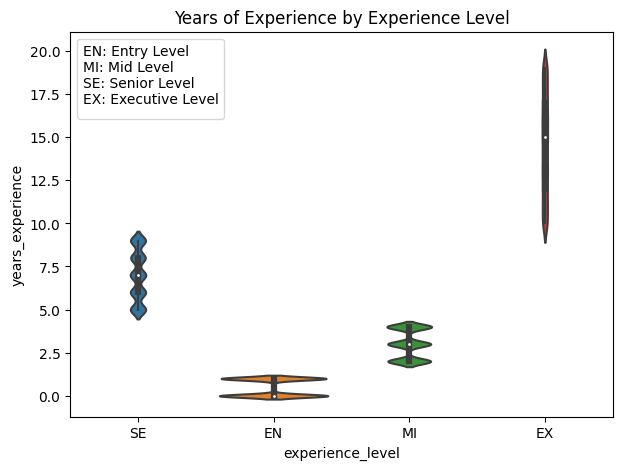

In [28]:
plt.figure(figsize=(7, 5))

sns.violinplot(x='experience_level', y='years_experience', data=data)
plt.title("Years of Experience by Experience Level")
plt.legend(title="EN: Entry Level\nMI: Mid Level\nSE: Senior Level\nEX: Executive Level", loc="upper left")

plt.show()

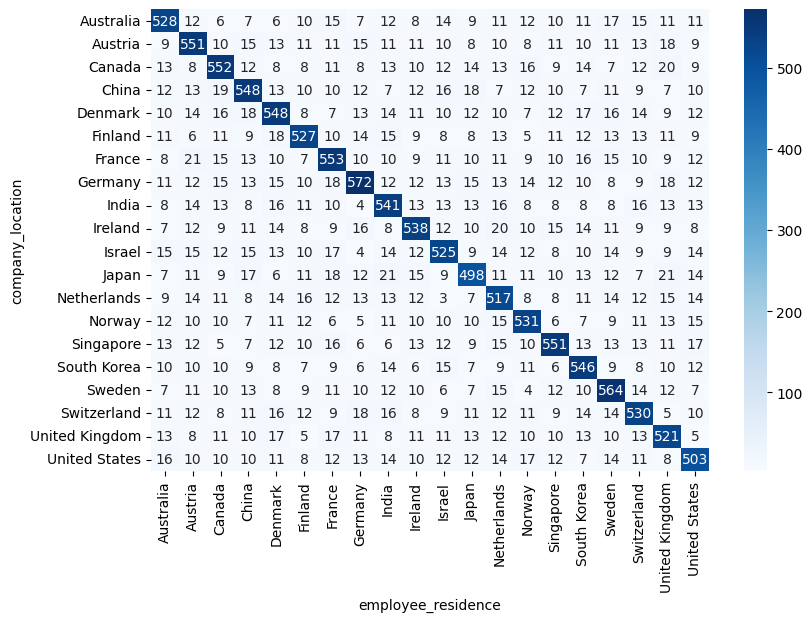

In [29]:
plt.figure(figsize=(9, 6))

cross_tab = pd.crosstab(df['company_location'], df['employee_residence'])
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues')

plt.show()

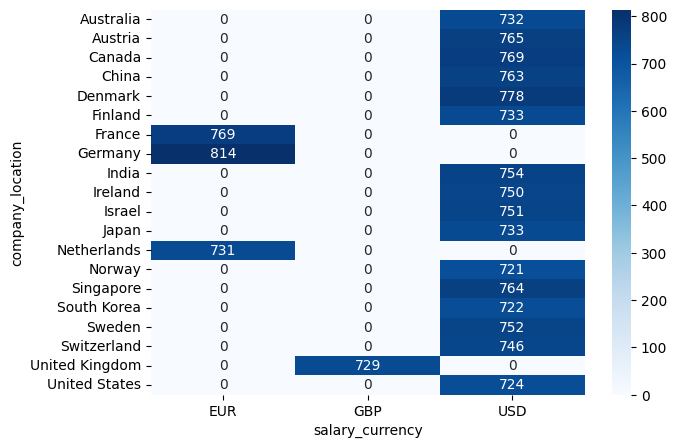

In [30]:
plt.figure(figsize=(7, 5))
cross_tab = pd.crosstab(df['company_location'], df['salary_currency'])
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues')
plt.show()

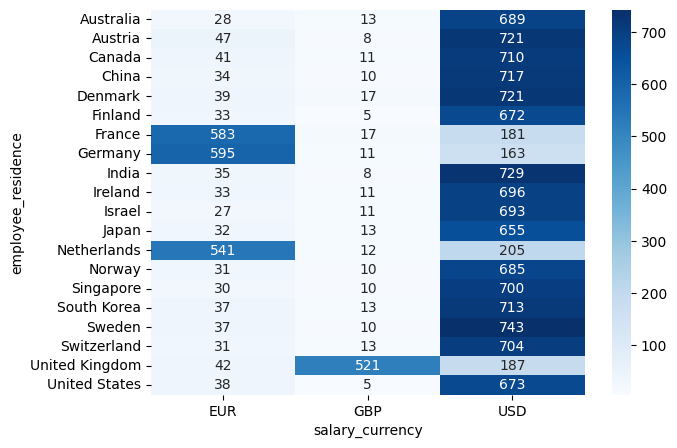

In [31]:
plt.figure(figsize=(7, 5))
cross_tab = pd.crosstab(df['employee_residence'], df['salary_currency'])
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues')
plt.show()

# Within-group distributions

## Which Skills Are Valued in Different Job Positions?

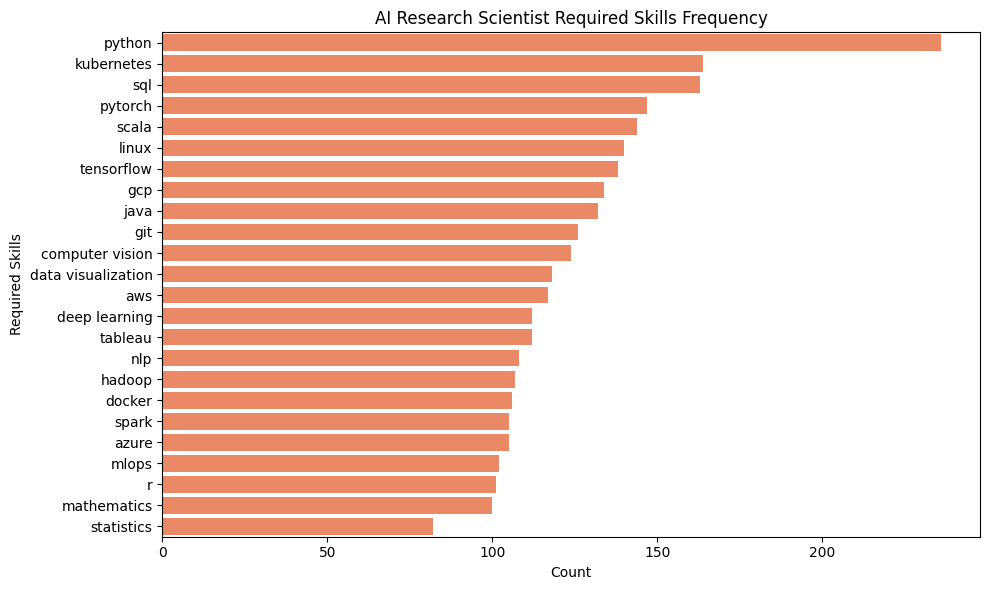

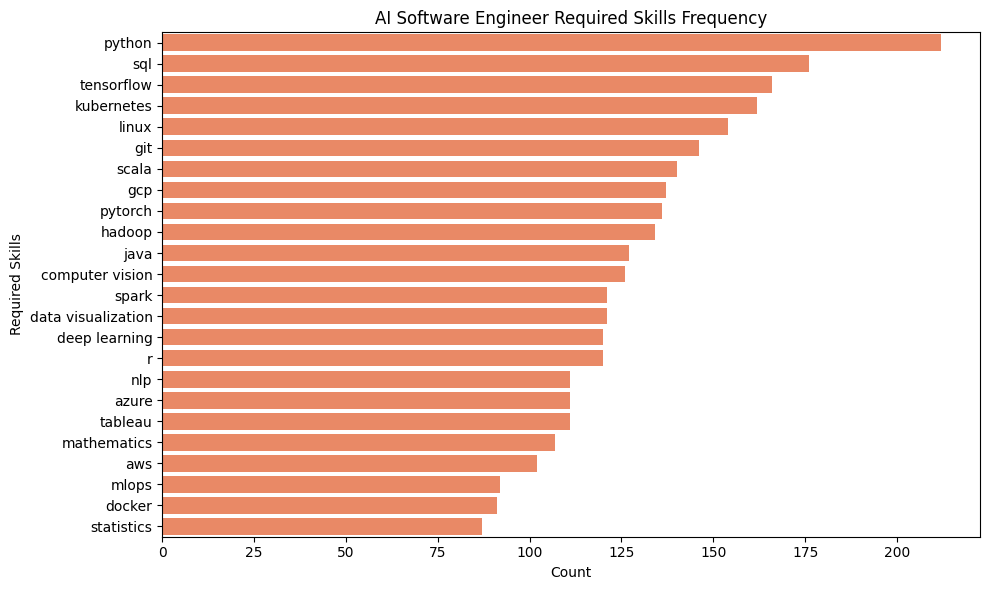

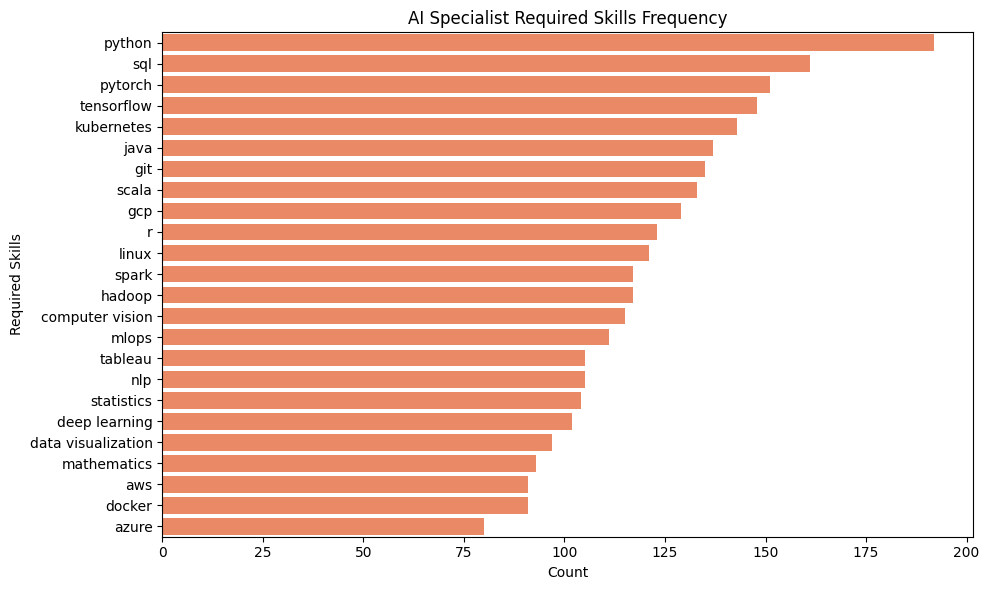

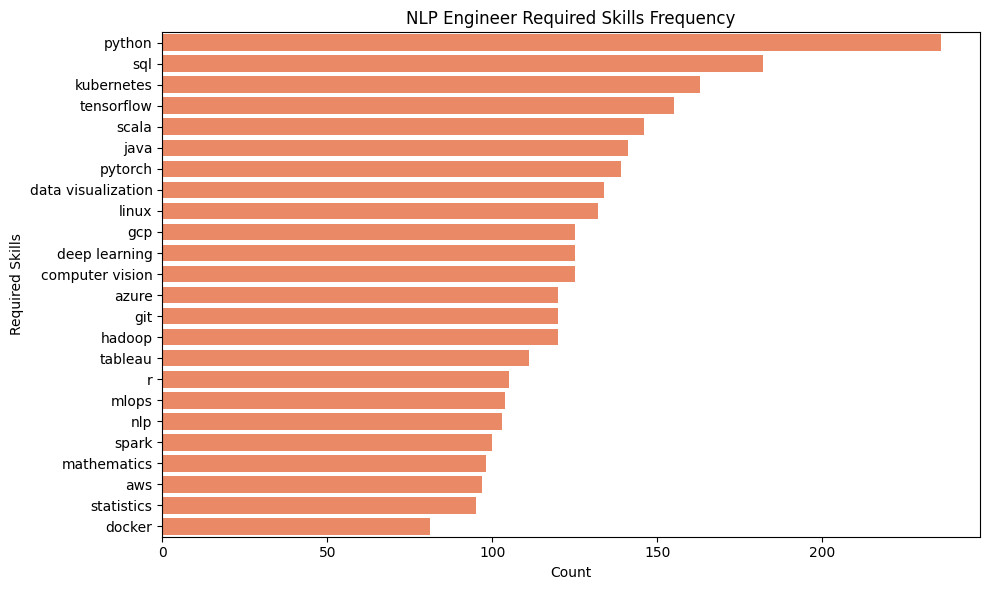

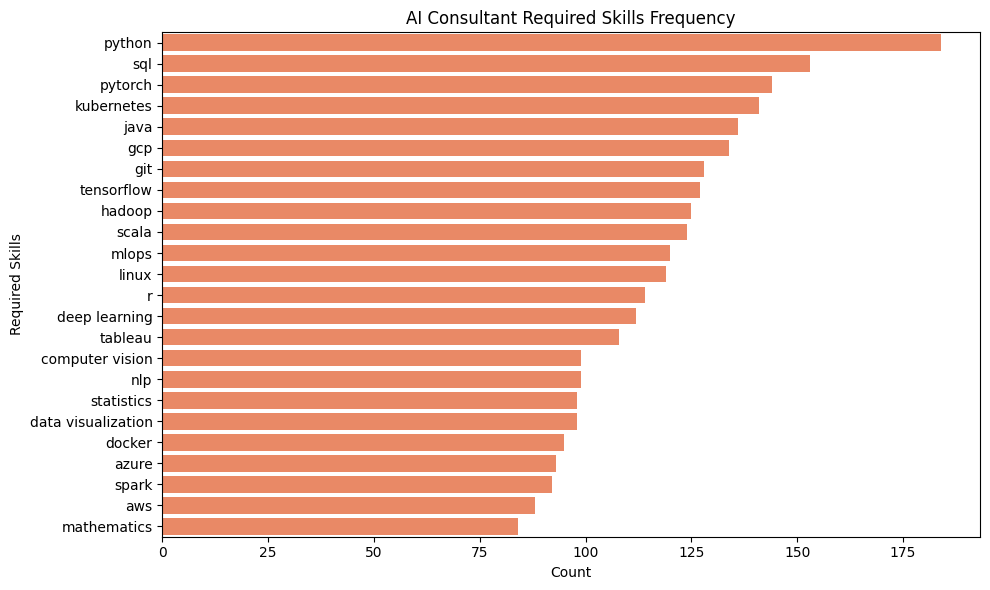

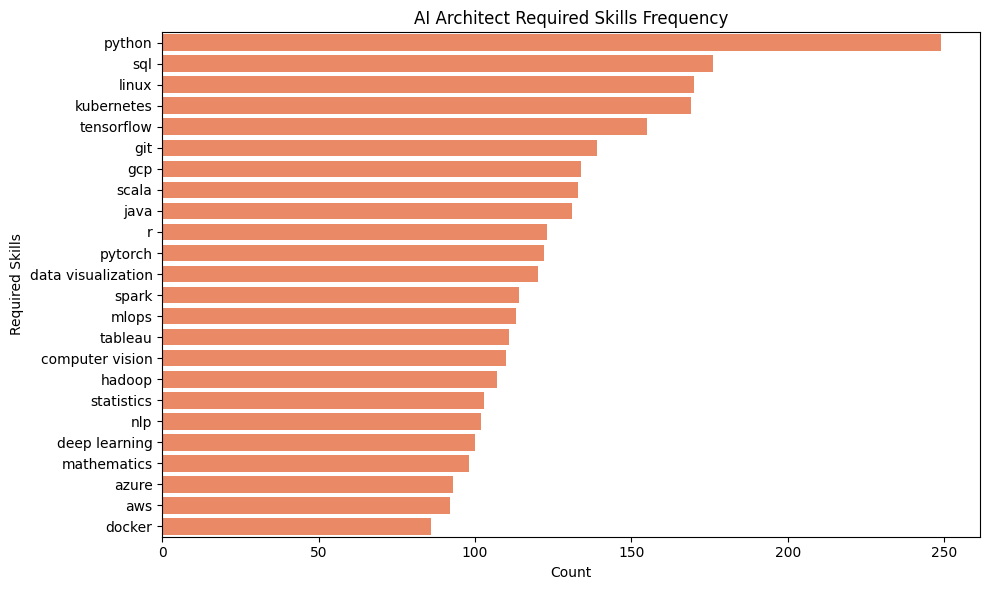

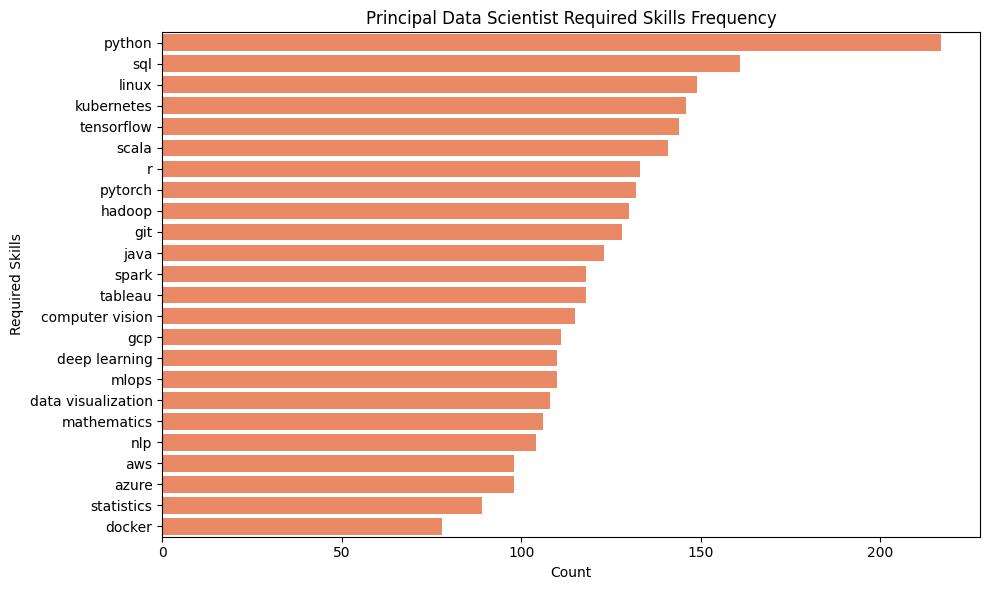

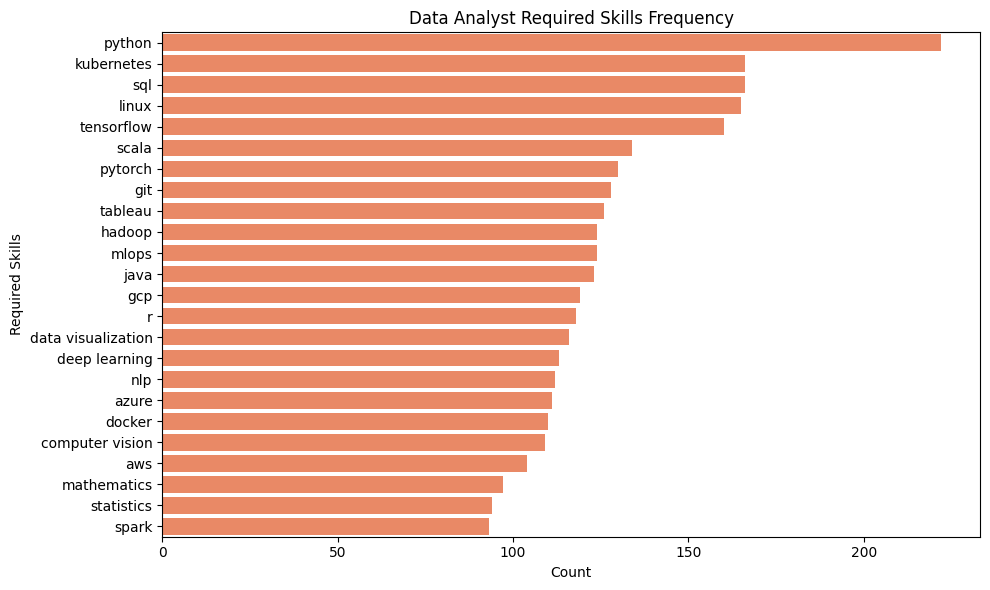

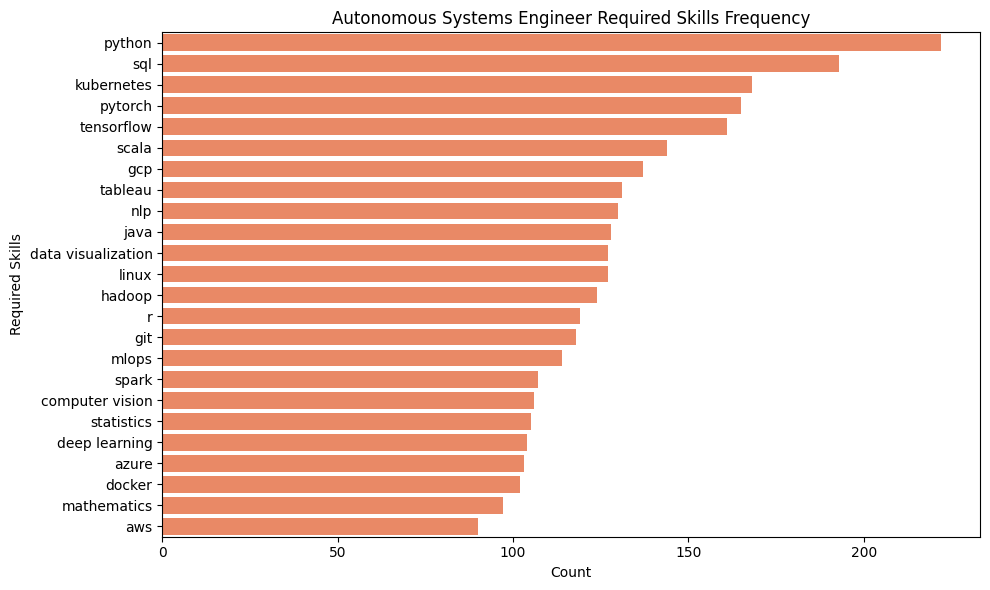

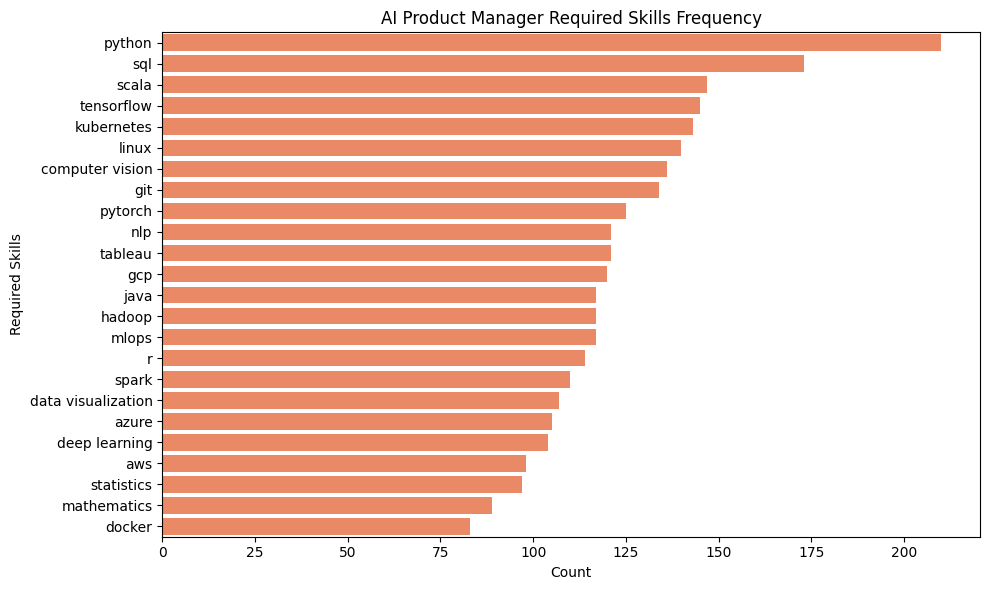

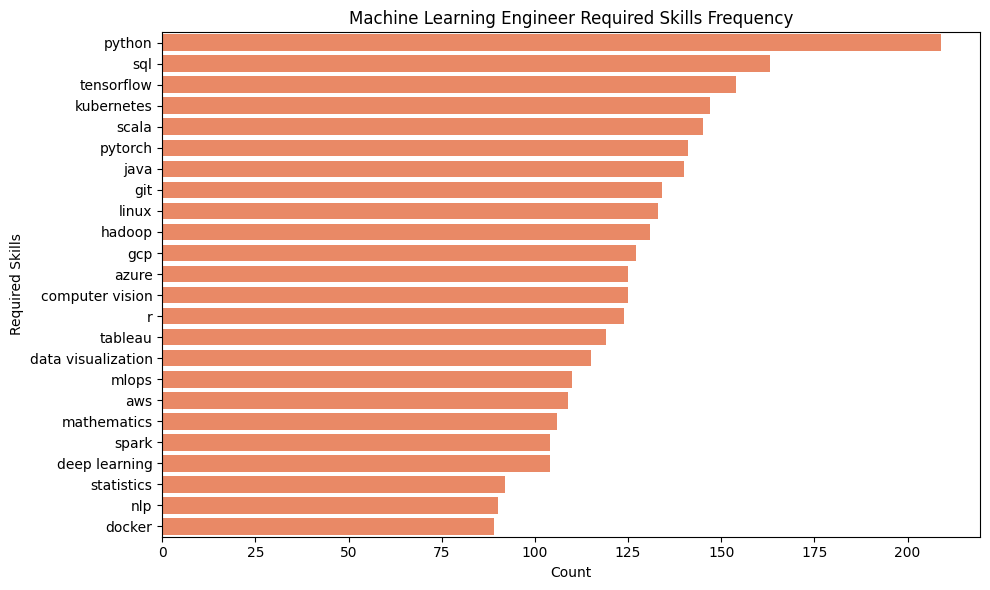

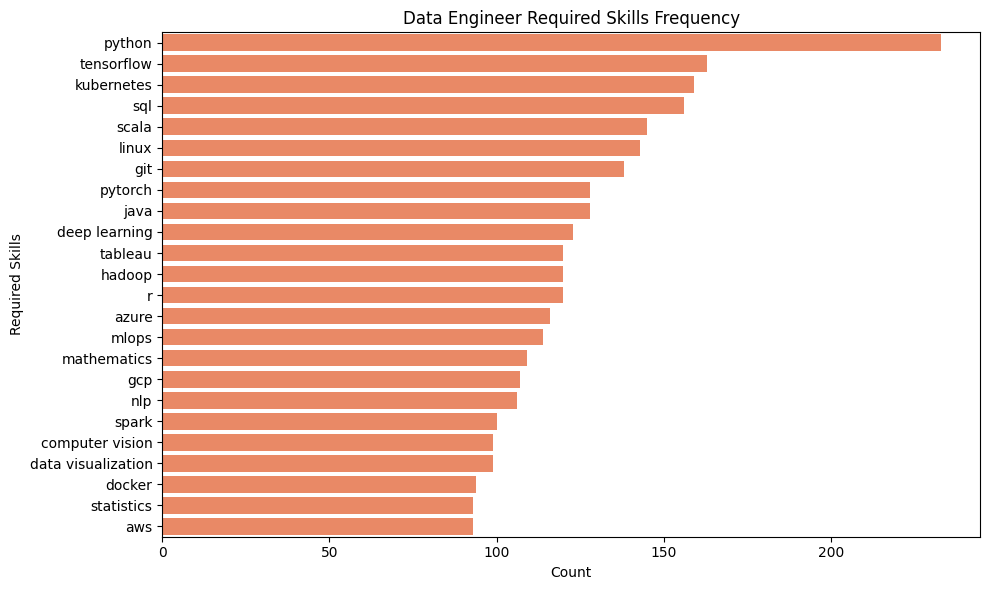

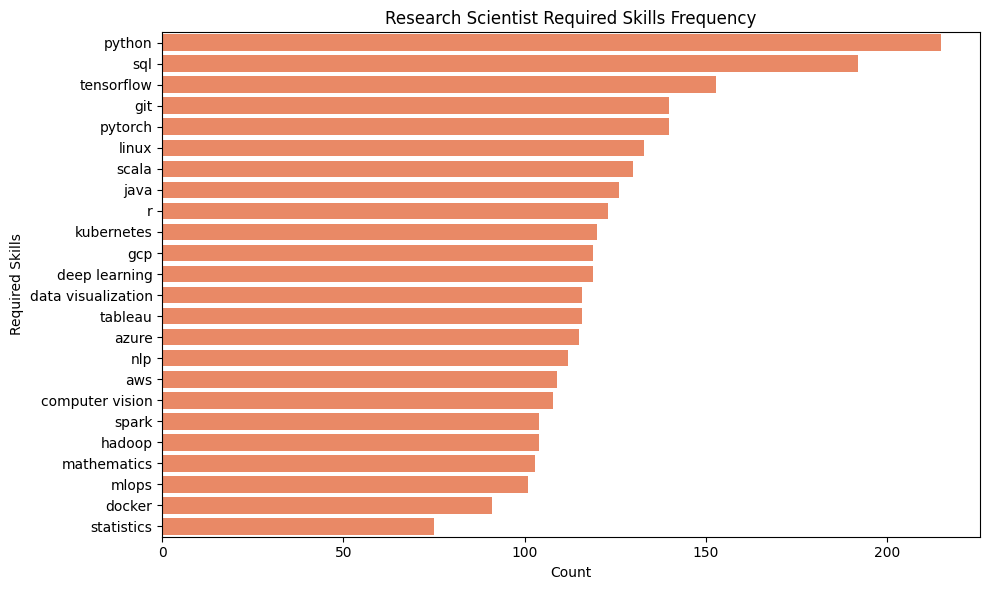

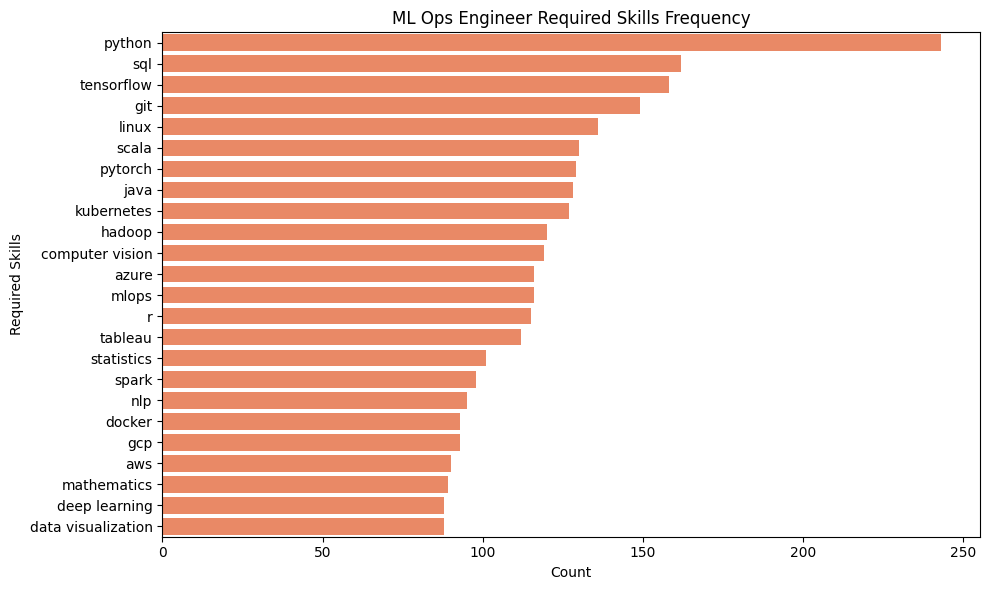

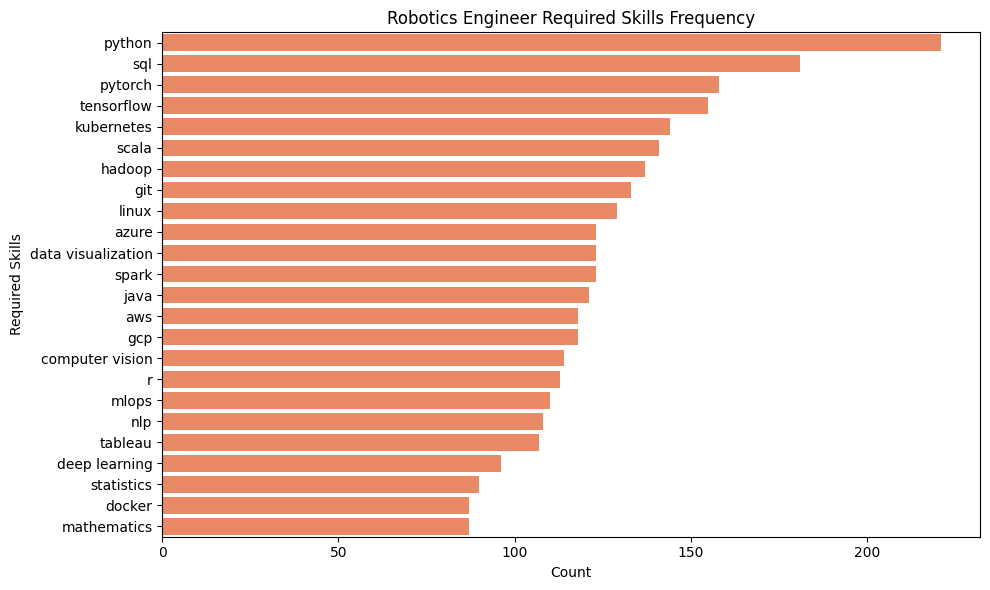

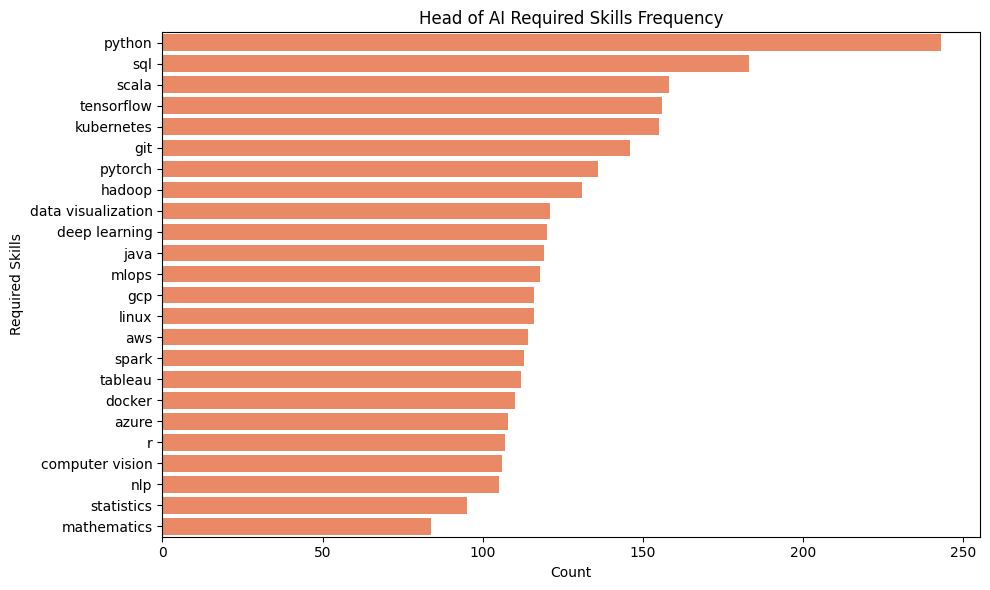

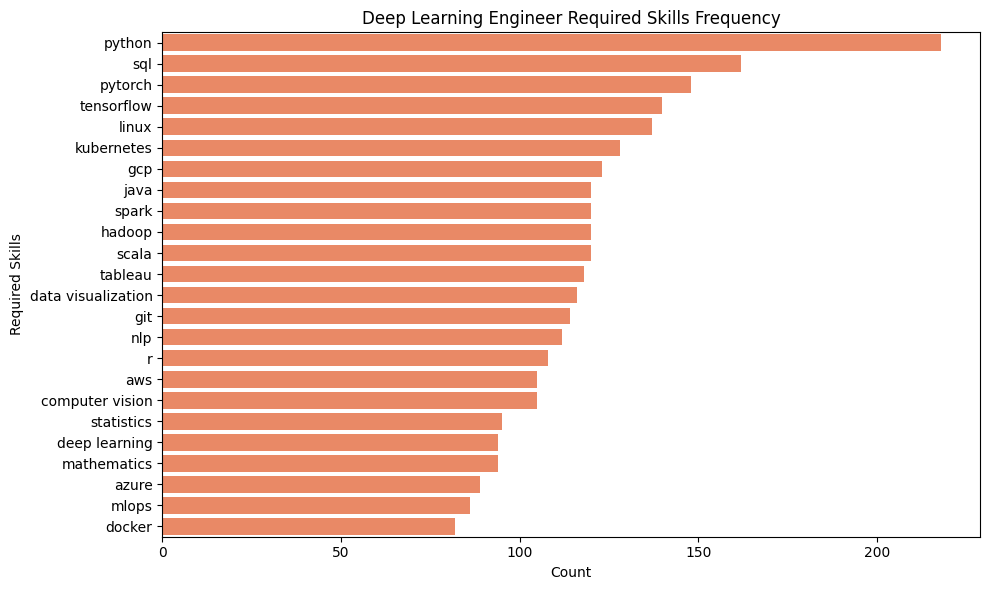

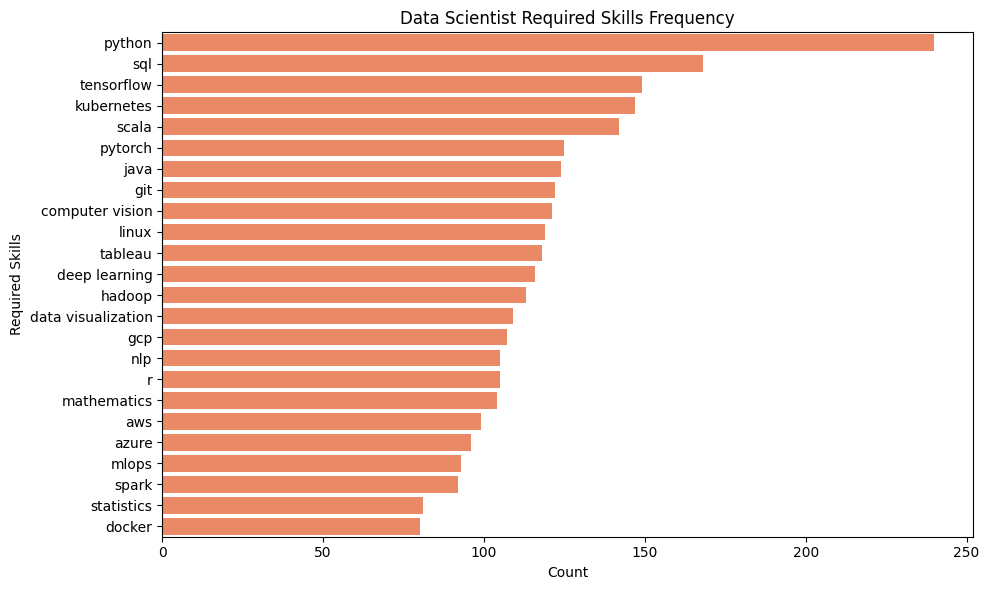

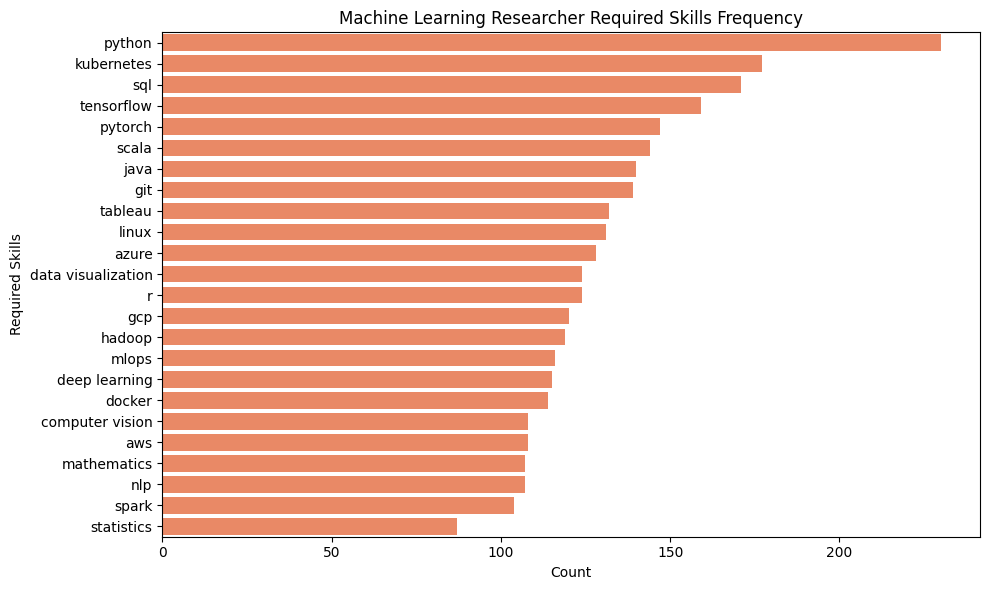

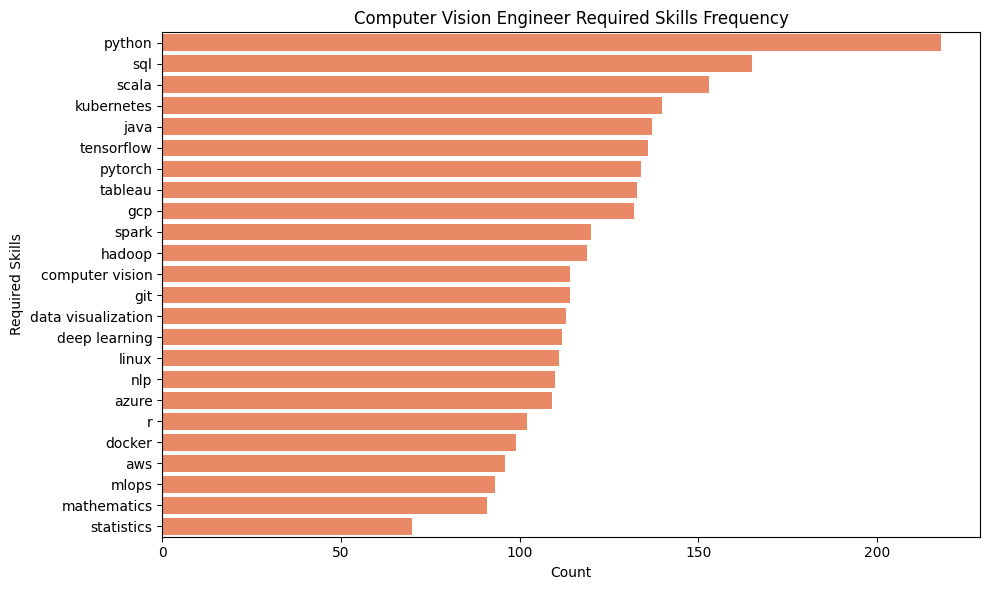

In [32]:
# hangi iş hangi yeteneklere önem vermiş
skill_data = data.copy()

skill_data['required_skills'] = skill_data['required_skills'].str.lower().str.split(',')
skill_data = skill_data.explode('required_skills')
skill_data['required_skills'] = skill_data['required_skills'].str.strip()

unique_titles = skill_data['job_title'].unique()

for title in unique_titles:
    subset = skill_data[skill_data['job_title'] == title]
    order = subset['required_skills'].value_counts().index
    
    plt.figure(figsize=(10, 6))
    sns.countplot(data=subset, y='required_skills', color='coral', order=order)
    plt.title(f"{title} Required Skills Frequency")
    plt.xlabel("Count")
    plt.ylabel("Required Skills")
    plt.tight_layout()
    plt.show()